In [21]:
import random as rd
import copy
from matplotlib import pyplot as plt
import pygad # https://pypi.org/project/pygad/
import sys
import math
import numpy as np

Generation = 1
Fitness    = 26.726799999999546
Change     = 26.726799999999546
Generation = 2
Fitness    = 27.07059999999951
Change     = 0.3437999999999626
Generation = 3
Fitness    = 27.07059999999951
Change     = 0.0
Generation = 4
Fitness    = 27.66079999999947
Change     = 0.5901999999999603
Generation = 5
Fitness    = 27.66079999999947
Change     = 0.0
Generation = 6
Fitness    = 28.79649999999951
Change     = 1.1357000000000426
Generation = 7
Fitness    = 30.118399999999472
Change     = 1.3218999999999603
Generation = 8
Fitness    = 30.48129999999945
Change     = 0.36289999999997846
Generation = 9
Fitness    = 30.48129999999945
Change     = 0.0
Generation = 10
Fitness    = 30.48129999999945
Change     = 0.0
Generation = 11
Fitness    = 32.0332999999994
Change     = 1.5519999999999499
Generation = 12
Fitness    = 32.0332999999994
Change     = 0.0
Generation = 13
Fitness    = 32.32999999999939
Change     = 0.2966999999999871
Generation = 14
Fitness    = 32.728399999999375
Change  

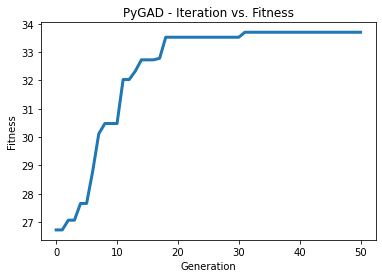

Parameters of the best solution : [4.95 9.  ]
Fitness value of the best solution = 33.70249999999938
Best fitness value reached after 31 generations.


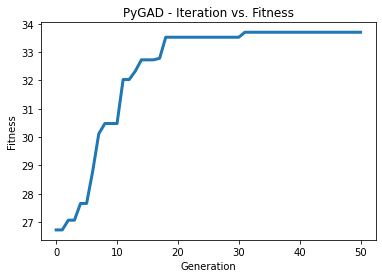

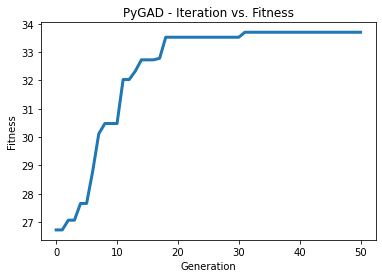

In [22]:


#the most important part in GA
def fitness_func(solution, solution_idx):
    # solution[i] represeent the value of the (i+1)th parameter in solution
    fitness =pow((solution[0]-2),2)+pow((solution[1]-4),2)
    return fitness

num_generations = 500 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 10 # Number of solutions in the population.


parent_selection_type = "sss" # Type of parent selection.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(
                       #Number of generations(iterations).
                       num_generations=50,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       #the Number of parameters(the number of genes)
                       num_genes=2,
                      # It is used to specify the possible values for each gene 
                      # in case the user wants to restrict the gene values. 
                      # It is useful if the gene space is restricted to 
                      # a certain range or to discrete values. 
                      # It accepts a list, tuple, or range. 
                      # When all genes have the same global space, 
                     # specify their values as a list/tuple/range. 
                     # For example, gene_space = [0.3, 5.2, -4, 8] 
                      # restricts the gene values to the 4 specified values. 
                     # If each gene has its own space, then the gene_space
                     # parameter can be nested like [[0.4, -5], [0.5, -3.2, 8.2, -9], ...] 
                     #  where the first sublist determines the values for 
                     # the first gene,the second sublist for the second gene, and so on.
                       gene_space=[np.arange(1, 5.01,0.01).tolist(),np.arange(6, 9.01,0.01).tolist()],
                       parent_selection_type=parent_selection_type,
                       # Number of parents to keep in the next population.
                       # -1 means keep all parents
                      # and 0 means keep nothing.
                       keep_parents=1,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       # Percentage of genes to mutate. This parameter has no action
                       # if the parameter mutation_num_genes exists.
                       mutation_percent_genes=50,
                       callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
#print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)
# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()

In [23]:
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [4.95 9.  ]
Fitness value of the best solution = 33.70249999999938


In [24]:
if ga_instance.best_solution_generation != -1:
    print("最佳解落在第 {best_solution_generation} 個世代".format(best_solution_generation = ga_instance.best_solution_generation))

最佳解落在第 31 個世代


In [25]:
print("最佳解 : {solution}".format(solution = solution))
print("最佳解的適應度 : {solution_fitness}".format(solution_fitness = solution_fitness))

NameError: name 'convert_to_decimal' is not defined